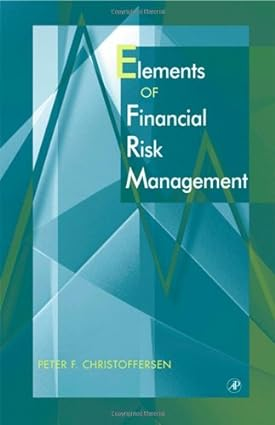

### Proprietà dei rendimenti finanziari giornalieri
- I rendimenti giornalieri presentano autocorrelazione bassa o nulla
- La distribuzione non condizionata dei rendimenti giornalieri ha valori estremi alti o bassi più frequenti di quanto non sarebbe previsto da una distribuzione normale (kurtosi maggiore di 3)
- si verifica che valori estremi negativi hanno maggiore frequenza di valori estremi positivi, perciò la distribuzione è asimmetrica (indice di asimmetria o "skew" minore di 0)
- la dimensione della volatilità dei rendimenti, misurata dalla deviazione standard, domina quella dei rendimenti
- la varianza, misurata dal quadrato dei rendimenti, presenta autocorrelazione con i valori passati
- nel mercato azionario si riscontra una relazione negativa fra rendimenti e varianza, momenti di elevata volatilità sono associati a rendimenti negativi
- allungando l'orizzonte temporale la distribuzione dei rendimenti diventa più vicina a quella normale

Fonte: Christoffersen P. (2003) Elements of Financial Risk Management, Academic Preess


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [ ]:
start = datetime.datetime(1982,12, 31)
end = datetime.datetime(2023, 12, 31)

In [ ]:
SP500 = pd.read_csv('SP500.csv', index_col = 0, parse_dates = True)

In [ ]:
SP500.head()

In [ ]:
#SP500 = yf.download('^GSPC', start, end)

In [ ]:
SP500['RS_Netto'] = SP500['Adj Close'].pct_change(1)

#### I rendimenti giornalieri presentano autocorrelazione bassa o nulla

In [ ]:
Autocorr = []
for i in range(1,100):
    x = SP500['RS_Netto'].autocorr(lag=i)
    Autocorr.append(x)

In [ ]:
plt.plot(Autocorr)
plt.grid()

In [ ]:
np.mean(Autocorr)

#### La distribuzione non condizionata dei rendimenti giornalieri ha valori estremi alti o bassi più frequenti di quanto non sarebbe previsto da una distribuzione normale (kurtosi maggiore di 3)

In [ ]:
plt.hist(SP500['RS_Netto'], bins = 90)
plt.grid()
plt.show()

In [ ]:
plt.hist(SP500['RS_Netto'], bins = 90)
plt.ylim(0,10)
plt.grid()
plt.show()

In [ ]:
SP500['RS_Netto'].kurtosis(skipna = True)

In [ ]:
from scipy.stats import norm

In [ ]:
plt.hist(SP500['RS_Netto'], bins=90, density=True, alpha=0.7, color ='blue', label = 'Istogramma')
mu, std = np.mean(SP500['RS_Netto']), np.std(SP500['RS_Netto'])
xmin, xmax = plt.xlim()
#x = np.linspace(min(SP500['RS_Netto']),max(SP500['RS_Netto']), 100)
x = np.linspace(xmin,xmax, 100)
p = norm.pdf(x,mu,std)

plt.plot(x,p,'r',linewidth=2, label = 'Distribuzione normale')
plt.xlabel = 'Valore'
plt.ylabel = 'Frequenza'
plt.title('Istogramma dei rendimenti e distribuzione normale ')
plt.legend()
plt.grid()
plt.ylim(0,0.1)
plt.show()

#### Si verificano valori estremi negativi con maggiore frequenza di valori estremi positivi, perciò la distribuzione è asimmetrica (indice di asimmetria o "skew" minore di 0)

In [ ]:
len(SP500['RS_Netto'])

Numero di giorni lavorativi considerati normali in un anno

In [ ]:
+len(SP500['RS_Netto'])/41


In [ ]:
mu

In [ ]:
std

In [ ]:
val_neg_estr = SP500['RS_Netto'][SP500['RS_Netto']<(mu-2.33*std)]

In [ ]:
len(val_neg_estr)

In [ ]:
len(val_neg_estr)/len(SP500['RS_Netto'])

In [ ]:
np.sum(val_neg_estr)

In [ ]:
val_pos_estr = SP500['RS_Netto'][SP500['RS_Netto']>(mu+2.33*std)]

In [ ]:
len(val_pos_estr)

In [ ]:
len(val_pos_estr)/len(SP500['RS_Netto'])

In [ ]:
np.sum(val_pos_estr)

In [ ]:
SP500['RS_Netto'].skew(skipna = True)

#### La dimensione della volatilità dei rendimenti, misurata dalla deviazione standard, domina quella dei rendimenti

In [ ]:
std/mu

Per questo motivo nei modelli di rischio a breve termine non si tiene conto del rendimento

Ma questo cambia man mano che allunghiamo l'orizzonte temporale, perché il rendimento aumenta linearmente ma la volatilità cresce con la radice quadrata del tempo

In [ ]:
SP500_w = SP500.groupby(pd.Grouper(freq='W')).last() #aggregazione settimanale
SP500_w.head()

In [ ]:
SP500_w['RS_Netto'] = SP500_w['Adj Close'].pct_change(1)

In [ ]:
mu_w = np.mean(SP500_w['RS_Netto'])
mu_w

In [ ]:
std_w = np.std(SP500_w['RS_Netto'])
std_w

In [ ]:
std_w/mu_w

In [ ]:
SP500_m = SP500.groupby(pd.Grouper(freq='M')).last() #aggregazione mensile
SP500_m.head()

In [ ]:
SP500_m['RS_Netto'] = SP500_m['Adj Close'].pct_change(1)

In [ ]:
mu_m = np.mean(SP500_m['RS_Netto'])
mu_m

In [ ]:
std_m = np.std(SP500_m['RS_Netto'])
std_m

In [ ]:
std_m/mu_m

In [ ]:
SP500_q = SP500.groupby(pd.Grouper(freq='Q')).last() #aggregazione quadrimestrale
SP500_q.head()

In [ ]:
SP500_q['RS_Netto'] = SP500_q['Adj Close'].pct_change(1)

In [ ]:
mu_q = np.mean(SP500_q['RS_Netto'])
mu_q

In [ ]:
std_q = np.std(SP500_q['RS_Netto'])
std_q

In [ ]:
std_q/mu_q

In [ ]:
mu_y = mu*252
mu_y

In [ ]:
std_y = std*np.sqrt(252)
std_y

In [ ]:
std_y/mu_y

#### La varianza, misurata dal quadrato dei rendimenti, presenta autocorrelazione positiva con i valori passati

In [ ]:
SP500['RS_Netto'].rolling(window=5).var().plot()
plt.grid()

In [ ]:
SP500['RS_2']=SP500['RS_Netto']**2

In [ ]:
SP500['RS_2'].plot()
plt.ylim=(0,0.01)
plt.grid()

In [ ]:
Autocorr_2 = []
for i in range(1,100):
    x = SP500['RS_2'].autocorr(lag=i)
    Autocorr_2.append(x)

In [ ]:
plt.plot(Autocorr_2)
plt.grid()

### Nel mercato azionario si riscontra una relazione negativa fra rendimenti e varianza, momenti di elevata volatilità sono associati a rendimenti negativi

In [ ]:
start = datetime.date(2004,5,31)
end = datetime.date(2024,3,31)
sp500 = yf.download(['^GSPC'], start, end)

In [ ]:
sp500.head()

In [ ]:
sp500 = sp500['Adj Close']
sp500.head()

In [ ]:
sp500.name = 'SP500'
sp500

In [ ]:
vix = yf.download(['^VIX'], start, end)

In [ ]:
vix = vix['Adj Close']
vix.head()

In [ ]:
vix.name = 'VIX'

In [ ]:
sp500_vix = pd.concat([sp500, vix], axis = 1) 
sp500_vix.head()

In [ ]:
sp500_vix.rename(columns={'Adj Close' : 'SP500','Adj Close' : 'VIX'}, inplace = True) 
sp500_vix.head()

In [ ]:
sp500_vix.plot(subplots=True, figsize=(10,6), grid = True)


In [ ]:
sp500_vix.plot(secondary_y = 'VIX', figsize=(19,6), grid = True)

In [ ]:
rets = np.log(sp500_vix/sp500_vix.shift(1))
rets.head()

In [ ]:
rets.dropna(inplace = True)
rets

In [ ]:
rets.plot(subplots=True, grid=True, figsize=(19,9));

Correlazione fra SP500 e VIX

In [ ]:
rets.corr()

Evidenziamo la correlazione negativa fra rendimenti del S&P500 e variazioni del VIX

In [ ]:
pd.plotting.scatter_matrix(rets, alpha = 0.5,
                           diagonal = 'hist',
                           hist_kwds = {'bins': 50},
                           figsize = (19,9), grid = True);

Stimiamo la relazione lineare fra i due

In [ ]:
reg = np.polyfit(rets['SP500'],rets['VIX'], deg = 1)

In [ ]:
ax = rets.plot(kind = 'scatter', x = 'SP500', y= 'VIX', figsize=(19,8))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw=2)
plt.grid();

Evoluzione nel tempo della correlazione

In [ ]:
ax = rets['SP500'].rolling(window=252).corr(rets['VIX']).plot(figsize=(19,9))
ax.axhline(rets.corr().iloc[0,1], c='r')
plt.grid()

VIX e volatilità

In [ ]:
sp500_vix.head(22)

In [ ]:
sp500_vix.head()

In [ ]:
sp500_vix['SP500_ret']=sp500_vix['SP500']/sp500_vix['SP500'].shift(1)

In [ ]:
sp500_vix.head()

In [ ]:
sp500_vix['Vola'] = sp500_vix['SP500_ret'].rolling(window = 22).std()*np.sqrt(252)*100

In [ ]:
sp500_vix.head(25)

In [ ]:
plt.figure(figsize = (19,8))
plt.plot(sp500_vix['Vola'])
plt.plot(sp500_vix['VIX'])
plt.grid();

In [ ]:
np.mean(sp500_vix['Vola'])

In [ ]:
np.mean(sp500_vix['VIX'])